In [ ]:
pip install nltk

In [16]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize,sent_tokenize
import matplotlib.pyplot as plt

In [30]:
import os
import glob

In [3]:
def load_data(path):
    try:
        data=pd.read_csv(path)
        return data
    except FileNotFoundError:
        print("File not Found")
        return None
    except Exception as e:
        print(f"An exception occured {e}")
        return None

In [4]:
file_path='C:/Users/anura/Downloads/emails/emails.csv'
data=load_data(file_path)

In [5]:
data.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()


In [9]:
def preprocessing(data): # Converting all words into lower and removing the stop words
    data['text']=data['text'].str.replace('Subject:','')
    data['text']=data['text'].apply(word_tokenize)
    data['text']=data['text'].apply(lambda x: [item for item in x if item.isalpha()])
    data['text']=data['text'].apply(lambda x: [item.lower() for item in x])
    data['text']=data['text'].apply(lambda x: [item for item in x if item not in stop_words])
    data['text'] = data['text'].apply(lambda x: " ".join(x))
    return data
    

In [10]:
 data_new= preprocessing(data)
 data_new.head(5)


,text,spam
0,naturally irresistible corporate identity lt r...,1
1,stock trading gunslinger fanny merrill muzo co...,1
2,unbelievable new homes made easy im wanting sh...,1
3,color printing special request additional info...,1
4,money get software cds software compatibility ...,1


In [11]:
import numpy as np
def custom_train_test_split(data, validation_ratio=0.1, test_ratio=0.1, random_seed=None):
 
    if random_seed is not None:
        np.random.seed(random_seed)

    
    shuffled_indices = np.random.permutation(len(data))

    
    validation_size=int(len(data) * validation_ratio)
    test_size = int(len(data) * test_ratio)

    
    validation_indices = shuffled_indices[:validation_size]
    test_indices = shuffled_indices[validation_size:(validation_size + test_size)]
    train_indices = shuffled_indices[(validation_size + test_size):]


    train_set = data.iloc[train_indices]
    validation_set=data.iloc[validation_indices]
    test_set = data.iloc[test_indices]

    return train_set,validation_set, test_set



In [25]:
train,validation,test=custom_train_test_split(data_new,0.2,0.1,random_seed=66)

In [12]:
import os
def create_and_save_datasets(train_set,validation_set,test_set,directory_path='.'):
    os.makedirs(directory_path,exist_ok=True)
    train_set.to_csv(os.path.join(directory_path, 'train_dataset.csv'), index=False)
    validation_set.to_csv(os.path.join(directory_path, 'validation_dataset.csv'), index=False)
    test_set.to_csv(os.path.join(directory_path, 'test_dataset.csv'), index=False)
    return None

In [38]:
def plot_distribution(data):
    """
    Plots the distribution of 0s and 1s in a given column.

    Parameters:
    column (pandas.Series): The column containing 0s and 1s.
    """
    # Count the occurrences of 0s and 1s
    counts = data['spam'].value_counts()

    # Plot the distribution
    print(counts)
    counts.plot(kind='bar', color=['blue', 'green'])
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.title('Distribution of 0s and 1s')
    plt.show()



### Before seed update

In [31]:
file_path=r'C:/Users/anura/Desktop/MLOPS/Assignment2_AML'
file_paths= glob.glob(os.path.join(file_path, '*.csv'))

In [34]:
test=pd.read_csv(file_paths[0])
train=pd.read_csv(file_paths[1])
validation=pd.read_csv(file_paths[2])

spam
0    3048
1     963
Name: count, dtype: int64


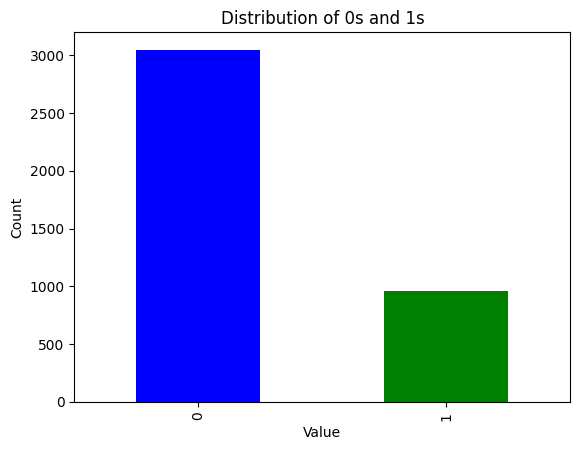

In [39]:
plot_distribution(train)

spam
0    885
1    260
Name: count, dtype: int64


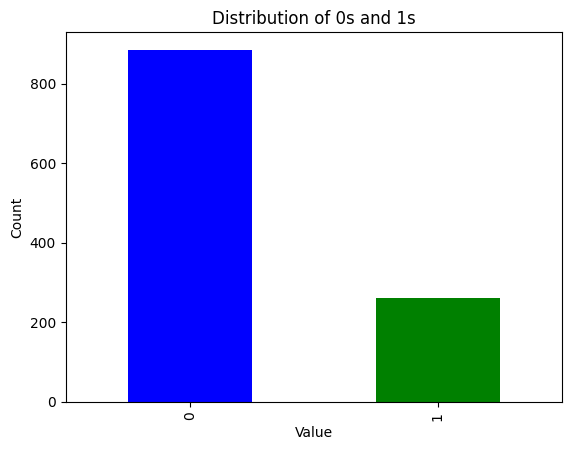

In [40]:
plot_distribution(validation)

spam
0    427
1    145
Name: count, dtype: int64


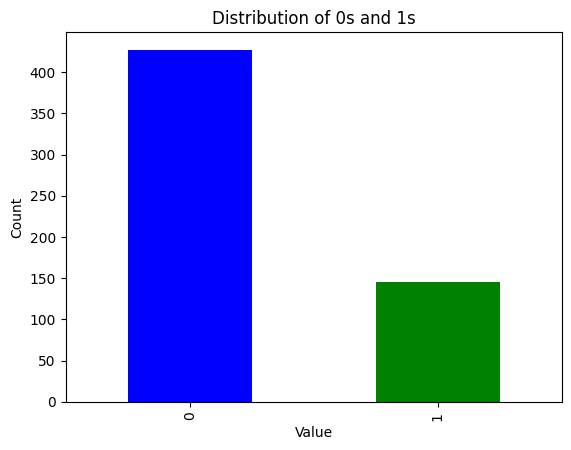

In [41]:
plot_distribution(test)

#### After updating Random seed

In [42]:
file_path=r'C:/Users/anura/Desktop/MLOPS/Assignment2_AML'
file_paths= glob.glob(os.path.join(file_path, '*.csv'))

In [43]:
test=pd.read_csv(file_paths[0])
train=pd.read_csv(file_paths[1])
validation=pd.read_csv(file_paths[2])

spam
0    3045
1     966
Name: count, dtype: int64


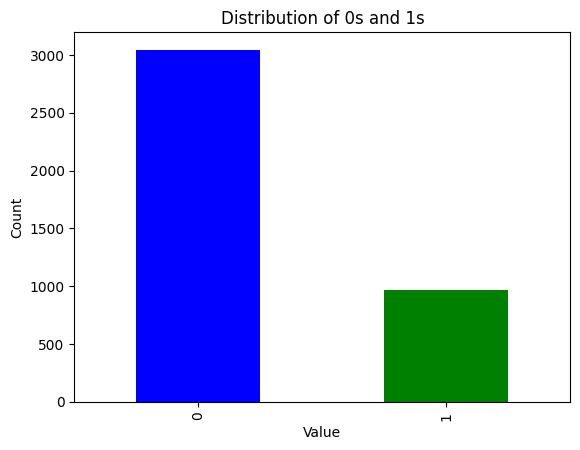

In [44]:
plot_distribution(train)

spam
0    875
1    270
Name: count, dtype: int64


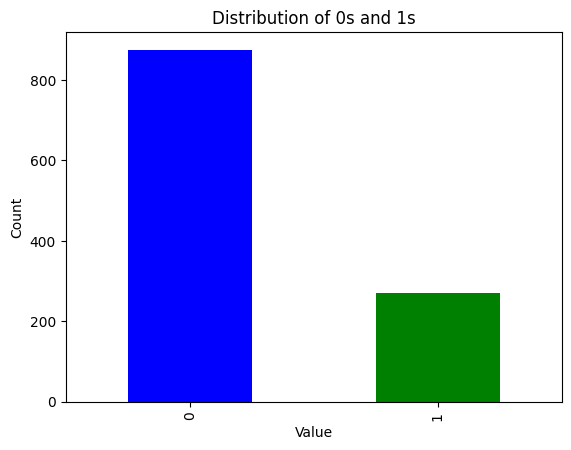

In [45]:
plot_distribution(validation)

In [29]:
directory_path='C:/Users/anura/Desktop/MLOPS/Assignment2_AML'
create_and_save_datasets(train,validation,test,directory_path)